<a href="https://colab.research.google.com/github/satyam-jha-16/Anuran-dataset-ML/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Read the csv file and store into dataFrame
anuran = pd.read_csv('frogs_mfcc.csv', sep = ',')

# anuran.iloc[0:10, 0:11]
anuran.iloc[0:10, 11:23]

,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre
5,-0.134528,-0.295123,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,AdenomeraAndre
6,-0.100379,-0.236428,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,AdenomeraAndre
7,-0.063748,-0.250981,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,AdenomeraAndre
8,-0.122893,-0.282427,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,AdenomeraAndre
9,-0.091062,-0.328433,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,AdenomeraAndre


In [6]:
############################################################################
#                          Split the dataset
############################################################################

seed_num = 0

# Seperate the data into dependent and independent variables
X = anuran.drop(['Species'], axis = 1)
y = anuran['Species'].values


# Divide the dataset: 80% for training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed_num)

ANOVA f-values:
MFCCs_ 1: 24.045377
MFCCs_ 2: 291.746404
MFCCs_ 3: 711.028597
MFCCs_ 4: 579.295842
MFCCs_ 5: 511.245362
MFCCs_ 6: 522.123014
MFCCs_ 7: 911.098591
MFCCs_ 8: 437.660610
MFCCs_ 9: 1438.315027
MFCCs_ 10: 481.376380
MFCCs_ 11: 1767.871498
MFCCs_ 12: 1079.294858
MFCCs_ 13: 2485.584179
MFCCs_ 14: 934.415775
MFCCs_ 15: 2231.624620
MFCCs_ 16: 315.750796
MFCCs_ 17: 1707.919964
MFCCs_ 18: 18.292097
MFCCs_ 19: 653.541264
MFCCs_ 20: 751.135886
MFCCs_ 21: 229.404073
MFCCs_ 22: 2205.111672


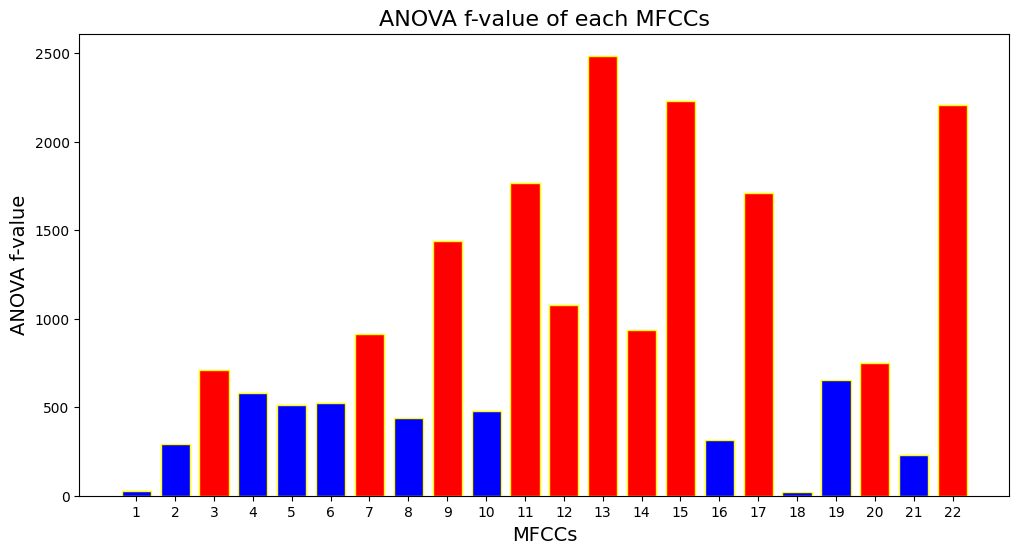

In [7]:
############################################################################
#                      Feature Selection (ANOVA)
############################################################################

features = SelectKBest(score_func = f_classif, k = 11)       # k=11 means that 11 out of 22 features will be selected
features.fit(X_train, y_train)


print('ANOVA f-values:')
# Compute the ANOVA f-value and display the values for each MFCCs
for i in range(len(features.scores_)):
    score = features.scores_[i]
    print('MFCCs_ %d: %f' % (i+1, features.scores_[i]))

# The top 11 features with the highest value will be selected
X_train_fs = features.transform(X_train)
X_test_fs = features.transform(X_test)

# The top 11 features with the highest score
k_list = [3, 7, 9, 11, 12, 13, 14, 15, 17, 20, 22]
colors = ["red" if i in k_list else "blue" for i in range(1,23)]

# Display the values for each MFCCs in bar chart graph
x = (np.array([i for i in range(len(features.scores_))])) + 1
y = features.scores_
plt.figure(figsize=(12, 6))
plt.bar(x, y, align='center', width=0.75, color=colors, edgecolor='yellow')
plt.xticks(np.arange(1,23))

plt.title('ANOVA f-value of each MFCCs', fontsize = 16)
plt.xlabel('MFCCs', fontsize = 14)
plt.ylabel("ANOVA f-value", fontsize = 14)
plt.show()

In [8]:
############################################################################
#                   Predictive model 1 - Decision Tree
############################################################################
model_dt = []
depths = np.arange(6, 18, 1)

# Find the best maximum of depth of tree
for d in depths:

    # Initialize the minimum of samples required to split = 12 and minimum of samples of leaf = 5
    model = DecisionTreeClassifier(criterion='gini', max_depth=d, min_samples_split=12, min_samples_leaf=5, random_state=seed_num)
    model.fit(X_train_fs, y_train)
    model_dt.append(model)

best_acc = 0
model_dt_best = None

for m,d in zip(model_dt, depths):
    acc = m.score(X_train_fs, y_train)
    print(f'Decision Tree classifier with maximum of depth of tree = {d} achieves a mean accuracy of {acc}')

    if acc > best_acc:
        best_acc = acc
        model_dt_best = m

print('\nThe highest mean accuracy:', best_acc)
print('Optimal model:', model_dt_best)

Decision Tree classifier with maximum of depth of tree = 6 achieves a mean accuracy of 0.9032314107018763
Decision Tree classifier with maximum of depth of tree = 7 achieves a mean accuracy of 0.9312022237665045
Decision Tree classifier with maximum of depth of tree = 8 achieves a mean accuracy of 0.9438846421125782
Decision Tree classifier with maximum of depth of tree = 9 achieves a mean accuracy of 0.9523974982626824
Decision Tree classifier with maximum of depth of tree = 10 achieves a mean accuracy of 0.9612578179291175
Decision Tree classifier with maximum of depth of tree = 11 achieves a mean accuracy of 0.9628214037526059
Decision Tree classifier with maximum of depth of tree = 12 achieves a mean accuracy of 0.9649061848505907
Decision Tree classifier with maximum of depth of tree = 13 achieves a mean accuracy of 0.965948575399583
Decision Tree classifier with maximum of depth of tree = 14 achieves a mean accuracy of 0.9678596247394023
Decision Tree classifier with maximum of d

In [9]:
# Insert the optimal parameter into the DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', max_depth = 14, min_samples_leaf = 5, min_samples_split = 12, random_state = seed_num)

# Train the decision tree model
model_dt.fit(X_train_fs, y_train)

# Predict the value
yhat = model_dt.predict(X_test_fs)

# Display the accuracy, confusion matrix and classification report
print('Accuracy:', accuracy_score(y_test, yhat))
print('\nConfusion matrix:', '\n', confusion_matrix(y_test, yhat))
print('\nClassification report:')
print(classification_report(y_test, yhat))

Accuracy: 0.940236275191105

Confusion matrix: 
 [[128   0   4   3   1   1   0   1   0   1]
 [  0 691   0   4   0   1   0   0   0   0]
 [  4   2  86   2   0   1   0   0   0   0]
 [  2   5   0  56   0   1   2   0   0   2]
 [  1   0   0   1  91   3   0   2   0   0]
 [  1   2   1   1   3 211   2   1   0   4]
 [  2   0   0   0   2   2  46   1   0   0]
 [  4   1   0   0   3   2   0   9   0   1]
 [  0   1   0   0   0   0   0   0  11   1]
 [  1   1   0   0   0   5   0   0   0  24]]

Classification report:
                        precision    recall  f1-score   support

        AdenomeraAndre       0.90      0.92      0.91       139
AdenomeraHylaedactylus       0.98      0.99      0.99       696
    Ameeregatrivittata       0.95      0.91      0.92        95
            HylaMinuta       0.84      0.82      0.83        68
  HypsiboasCinerascens       0.91      0.93      0.92        98
     HypsiboasCordobae       0.93      0.93      0.93       226
   LeptodactylusFuscus       0.92      0.87    

In [10]:
############################################################################
#               Predictive model 2 - Support Vector Machine
############################################################################

param_grid = {'kernel': ('rbf', 'sigmoid'), 'C': [0.1, 1, 2, 3, 4, 5, 10, 100]}
clf = SVC()
gscv = GridSearchCV(clf, param_grid, cv=3, refit=True, verbose=3, n_jobs=6)
gscv.fit(X_train_fs, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 10, 100],
                         'kernel': ('rbf', 'sigmoid')},
             verbose=3)

In [11]:
# Display the best parameter and its corresponding index
print('Index:', gscv.best_index_)
print('Best parameter:', gscv.best_params_)

Index: 12
Best parameter: {'C': 10, 'kernel': 'rbf'}


In [12]:
# Insert the best parameter into the DecisionTreeClassifier
model_svc_best = SVC(kernel='rbf', C = 10, gamma = 'scale')

# Train the SVC model
model_svc_best.fit(X_train_fs, y_train)

# Predict the value using SVC model
y_pred = model_svc_best.predict(X_test_fs)

# Display the accuracy, confusion matrix and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion matrix:', '\n', confusion_matrix(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9742876997915219

Confusion matrix: 
 [[136   0   0   2   0   0   0   0   0   1]
 [  0 693   1   2   0   0   0   0   0   0]
 [  0   0  95   0   0   0   0   0   0   0]
 [  3   3   1  59   0   0   1   0   1   0]
 [  1   0   0   0  97   0   0   0   0   0]
 [  0   2   0   1   0 214   4   4   0   1]
 [  0   0   0   0   0   2  51   0   0   0]
 [  1   0   0   0   2   0   1  16   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  1   0   0   0   1   0   0   1   0  28]]

Classification report:
                        precision    recall  f1-score   support

        AdenomeraAndre       0.96      0.98      0.97       139
AdenomeraHylaedactylus       0.99      1.00      0.99       696
    Ameeregatrivittata       0.98      1.00      0.99        95
            HylaMinuta       0.92      0.87      0.89        68
  HypsiboasCinerascens       0.97      0.99      0.98        98
     HypsiboasCordobae       0.99      0.95      0.97       226
   LeptodactylusFuscus       0.89      0.96   

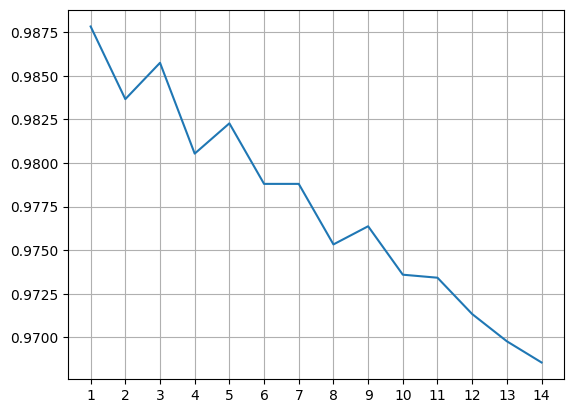

The best value of k is 1 with score 0.9878387769284225


In [21]:
############################################################################
#             Determine the best value of k using cross validation
############################################################################
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

scores = []
maxScore = 0
bestK = 0

for k in range(1,15):
    knnModel = KNeighborsClassifier(n_neighbors=k)   # Default metric: minkowski with p=2
    knnModel.fit(X_train, y_train)
    score = cross_val_score(knnModel, X_train, y_train, cv=4)  # Use cross_val_score to find the k parameter
    score = np.mean(score)
    if maxScore < score:
        maxScore = score
        bestK = k
    scores.append(score)

plt.plot(np.arange(1,15), scores)
plt.xticks(np.arange(1,15))
plt.grid()
plt.show()
print("The best value of k is", bestK, "with score", max(scores))

In [14]:
############################################################################
#                          Performance metrics
############################################################################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knnModel = KNeighborsClassifier(n_neighbors=bestK)
knnModel.fit(X_train, y_train)

y_pred = knnModel.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(" ")
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(" ")
print('Classification report:')
print(classification_report(y_test, y_pred))
print(" ")

The best value of k is 1 with score 0.9878387769284225
Accuracy: 0.9847116052814454
 
Confusion matrix:
[[135   0   0   2   0   2   0   0   0   0]
 [  0 696   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   1   0   0   0   0]
 [  1   0   0  67   0   0   0   0   0   0]
 [  0   0   0   0  96   1   0   1   0   0]
 [  0   1   0   1   4 217   1   2   0   0]
 [  0   0   0   0   1   0  52   0   0   0]
 [  0   0   0   0   2   1   1  16   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   0   0   0  31]]
 
Classification report:
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.97      0.98       139
AdenomeraHylaedactylus       1.00      1.00      1.00       696
    Ameeregatrivittata       1.00      0.99      0.99        95
            HylaMinuta       0.96      0.99      0.97        68
  HypsiboasCinerascens       0.93      0.98      0.96        98
     HypsiboasCordobae       0.98      0.96      0.97  

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
